In [127]:
include("PVCR.jl");

# Residential Cases

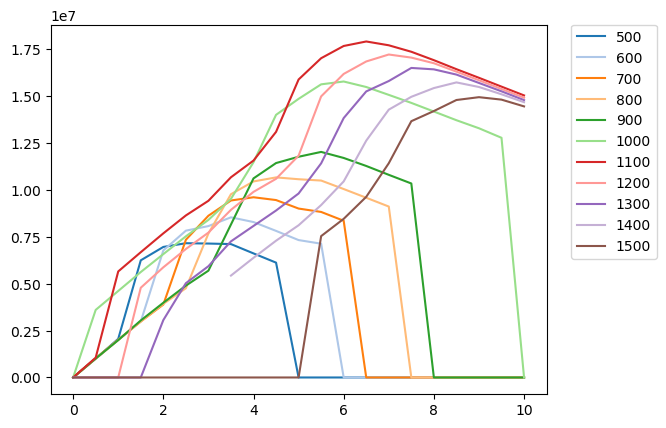

In [128]:
consumption = 500:100:1500
for (ix, co) in enumerate(consumption)
    residential.econsumption = co; get_pmax(residential);
    res = optimal_pv(residential, PVRes, 0.0:.5:10, BAC1, tariff_increase = true)
    plot(res[2][:,1],res[2][:,2],color = cpalette20[ix], label = co)
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [ ]:
consumption = 1500:500:6000
capacity = 0.0:0.5:15

results = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    residential.econsumption = co; get_pmax(residential);
    for (jx, ca) in enumerate(capacity)
    PVRes.capacity = ca
    results[ix,jx] = mean(PV_netcost(residential, PVRes, BAC1))  
    end
end

In [ ]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = co)
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("Average Monthly Savings/Losses")
grid("on");

# Commercial Industrial Cases

In [ ]:
consumption = 500:500:3000
capacity = 0.0:1:35
results = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    commercial.econsumption = co; get_pmax(commercial);
    for (jx, ca) in enumerate(capacity)
    PVComInd.capacity = ca
    results[ix,jx] = npv(sum(PV_netcost(commercial, PVComInd, BAC1), dims=1), 0.11) 
    end
end

In [ ]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = co)
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV of investment")
grid("on");

In [ ]:
consumption = 2800:500:6000
capacity = 0:1:60

results = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    commercial.econsumption = co; get_pmax(commercial);
    for (jx, ca) in enumerate(capacity)
    PVComInd.capacity = ca
    results[ix,jx] = npv(sum(PV_netcost(commercial, PVComInd, BAC1), dims=1), 0.01) 
    end
end

In [ ]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = co)
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV of investment")
grid("on");

In [ ]:
consumption = 6000:500:10000
capacity = 0.0:1.0:200

results = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    commercial.econsumption = co; get_pmax(commercial);
    for (jx, ca) in enumerate(capacity)
    PVComInd.capacity = ca
    results[ix,jx] = npv(sum(PV_netcost(commercial, PVComInd, BAC1), dims=1), 0.11) 
    end
end

In [ ]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = co)
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV of investment")
grid("on");

# Medium Voltage Cases

In [ ]:
consumption = 10000:10000:100000
capacity = 0:1:150

results = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    mediumvoltage.econsumption = co; get_pmax(mediumvoltage);
    for (jx, ca) in enumerate(capacity)
    PVTMT.capacity = ca
    results[ix,jx] = npv(sum(PV_netcost(mediumvoltage, PVTMT, BAC1), dims=1),0.08)
    end
end

In [ ]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = co)
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV of investment")
grid("on");